In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
ea = pd.read_excel('/data/pmi-eu-sep20.xlsx',sheet_name='EA')
de = pd.read_excel('/data/pmi-eu-sep20.xlsx',sheet_name='DE')
fr = pd.read_excel('/data/pmi-eu-sep20.xlsx',sheet_name='FR')

In [3]:
pd.set_option('max_columns', None)

ea.drop([0], inplace=True)

ea.set_index('Name', inplace=True)
de.set_index('Name', inplace=True)
fr.set_index('Name', inplace=True)

In [4]:
ea = ea.astype(float)
ea.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 285 entries, 1997-01-15 to 2020-09-15
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   EM MARKIT PMI: MANUFACTURING SADJ                          280 non-null    float64
 1   EM MARKIT PMI: MANUFACTURING - OUTPUT SADJ                 280 non-null    float64
 2   EM MARKIT PMI: MANUFACTURING - NEW ORDERS SADJ             280 non-null    float64
 3   EM MARKIT PMI: MANUFACTURING - EMPLOYMENT SADJ             280 non-null    float64
 4   EM MARKIT PMI: MANUFACTURING - DELIVERY TIMES SADJ         280 non-null    float64
 5   EM MARKIT PMI: MANUFACTURING - STOCKS OF PURCHASES SADJ    280 non-null    float64
 6   EM MARKIT PMI: MANUFACTURING - INPUT PRICES SADJ           280 non-null    float64
 7   EM MARKIT PMI: MANUFACTURING - OUTPUT PRICES SADJ          215 non-null    floa

In [5]:
ea.tail(3)

,EM MARKIT PMI: MANUFACTURING SADJ,EM MARKIT PMI: MANUFACTURING - OUTPUT SADJ,EM MARKIT PMI: MANUFACTURING - NEW ORDERS SADJ,EM MARKIT PMI: MANUFACTURING - EMPLOYMENT SADJ,EM MARKIT PMI: MANUFACTURING - DELIVERY TIMES SADJ,EM MARKIT PMI: MANUFACTURING - STOCKS OF PURCHASES SADJ,EM MARKIT PMI: MANUFACTURING - INPUT PRICES SADJ,EM MARKIT PMI: MANUFACTURING - OUTPUT PRICES SADJ,EM MARKIT PMI: MANUFACTURING - BACKLOG SADJ,EM MARKIT PMI: MANUFACTURING - QUANTITY OF PURCHASES SADJ,EM MARKIT PMI: MANUFACTURING - NEW EXPORT ORDERS SADJ,EM MARKIT PMI: MANUFACTURING - FUTURE OUTPUT NADJ,EM MARKIT PMI: MANUFACTURING - FINISHED GOODS SADJ,EM MARKIT PMI: SERVICES - BUSINESS ACTIVITY SADJ,EM MARKIT PMI: SERVICES - EMPLOYMENT SADJ,EM MARKIT PMI: SERVICES - PRICES CHARGED SADJ,EM MARKIT PMI: SERVICES - NEW BUSINESS SADJ,EM MARKIT PMI: SERVICES - INPUT PRICES SADJ,EM MARKIT PMI: SERVICES - OUTSTANDING BUSINESS SADJ,EM MARKIT PMI: SERVICES - BUSINESS EXPECTATIONS SADJ,EM MARKIT PMI: COMPOSITE - BACKLOG SADJ,EM MARKIT PMI: COMPOSITE - EMPLOYMENT SADJ,EM MARKIT PMI: COMPOSITE - NEW ORDERS SADJ,EM MARKIT PMI: COMPOSITE - OUTPUT PRICES SADJ,EM MARKIT PMI: COMPOSITE - OUTPUT SADJ,EM MARKIT PMI: COMPOSITE - INPUT PRICES SADJ,EM MARKIT PMI: COMPOSITE - NEW EXPORT ORDERS SADJ,EM MARKIT PMI: COMPOSITE - FUTURE OUTPUT NADJ,EM MARKIT FLASH PMI: COMPOSITE - NEW EXPORT ORDERS SADJ,EM MARKIT PMI: SERVICES - NEW EXPORT ORDERS SADJ
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-15,51.8,55.32,56.10,42.87,46.99,46.32,47.51,48.98,49.57,48.34,51.82,58.78,46.11,54.7,47.88,47.82,51.40,52.45,48.51,59.45,48.80,46.53,52.66,48.13,54.9,51.12,49.14,59.27,49.08,42.19
2020-08-15,51.7,55.64,55.41,44.17,47.70,45.06,50.14,49.39,50.38,49.89,51.94,61.47,45.08,50.5,47.76,48.21,49.84,53.40,47.15,56.46,48.02,46.79,51.34,48.53,51.9,52.52,48.81,57.81,49.04,40.70
2020-09-15,53.7,56.80,57.08,47.42,44.17,45.08,49.79,49.40,52.87,52.42,55.56,63.83,45.29,47.6,47.57,46.85,47.75,53.13,46.62,58.99,48.30,47.53,50.26,47.54,50.1,52.23,51.50,60.29,51.50,40.94


In [6]:
ea_man = ea.iloc[:,0:13]
ea_ser = ea.iloc[:,13:20]
ea_comp = ea.iloc[:,20:29]

ea_comp_output = ea.iloc[:,24]

ea20_man = ea.iloc[276:,0]
ea20_ser = ea.iloc[276:,13]
ea20_comp_empl = ea.iloc[276:,21]

## Plots 

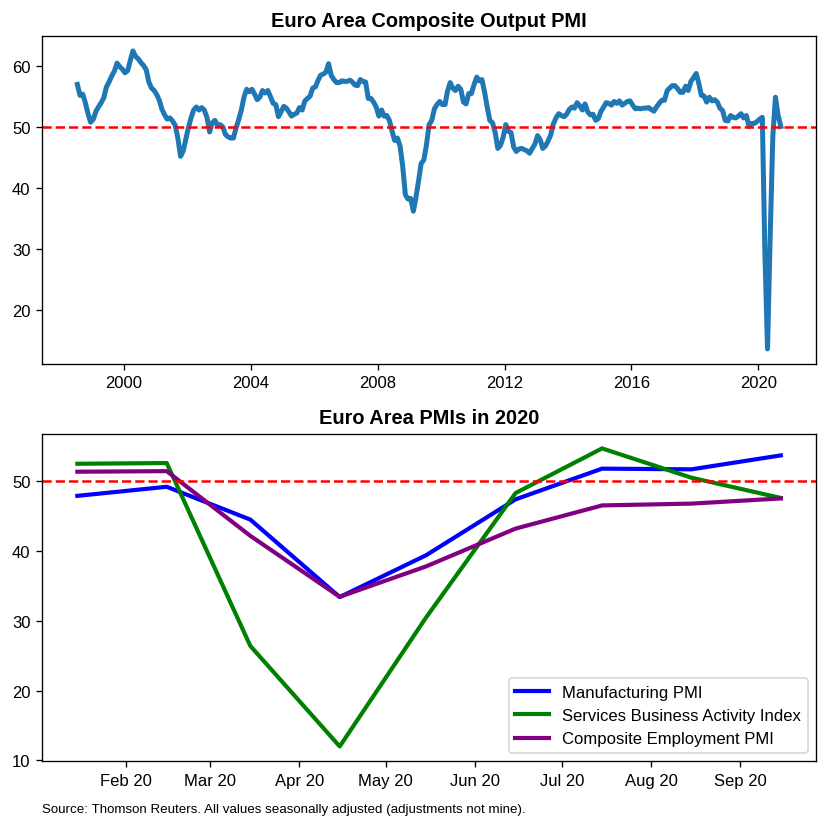

In [7]:
fig, ax = plt.subplots(figsize=[7,7], dpi=120, nrows=2, ncols=1)

ax[0].plot(ea_comp_output, lw=3)
ax[0].set_title('Euro Area Composite Output PMI', fontweight='bold')
ax[0].axhline(y=50, color='r', linestyle='--')
ax[0].xaxis.set_major_formatter(DateFormatter("%Y"))

ax[1].plot(ea20_man, color='blue', label='Manufacturing PMI', lw=2.5)
ax[1].plot(ea20_ser, color='green', label='Services Business Activity Index', lw=2.5)
ax[1].plot(ea20_comp_empl, color='purple', label='Composite Employment PMI', lw=2.5)
ax[1].legend()
ax[1].set_title('Euro Area PMIs in 2020', fontweight='bold')
ax[1].axhline(y=50, color='r', linestyle='--')
ax[1].xaxis.set_major_formatter(DateFormatter("%b %y"))

plt.annotate('Source: Thomson Reuters. All values seasonally adjusted (adjustments not mine).', (0,0), (0,-25), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')

plt.style.use('seaborn')
fig.tight_layout()

In [8]:
fig.savefig("output/PMIs.png")

In [9]:
euall = pd.concat([ea_comp_output[276:], ea20_man,ea20_ser, ea20_comp_empl], axis=1)

In [10]:
de.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, Code to 2020-09-15 00:00:00
Data columns (total 29 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   BD MARKIT/BME PMI: MANUFACTURING SADJ                          286 non-null    object
 1   BD MARKIT/BME PMI: MANUFACTURING - OUTPUT SADJ                 286 non-null    object
 2   BD MARKIT/BME PMI: MANUFACTURING - NEW ORDERS SADJ             286 non-null    object
 3   BD MARKIT/BME PMI: MANUFACTURING - EMPLOYMENT SADJ             286 non-null    object
 4   BD MARKIT/BME PMI: MANUFACTURING - DELIVERY TIMES SADJ         286 non-null    object
 5   BD MARKIT/BME PMI: MANUFACTURING - STOCKS OF PURCHASES SADJ    286 non-null    object
 6   BD MARKIT/BME PMI: MANUFACTURING - INPUT PRICES SADJ           286 non-null    object
 7   BD MARKIT/BME PMI: MANUFACTURING - QUANTITY OF PURCHASES 

In [11]:
pmide = de.iloc[277:,24]
pmifr = fr.iloc[277:,24]
final = pd.concat([euall, pmide, pmifr], axis=1)
final

,EM MARKIT PMI: COMPOSITE - OUTPUT SADJ,EM MARKIT PMI: MANUFACTURING SADJ,EM MARKIT PMI: SERVICES - BUSINESS ACTIVITY SADJ,EM MARKIT PMI: COMPOSITE - EMPLOYMENT SADJ,BD MARKIT PMI: COMPOSITE - OUTPUT SADJ,FR MARKIT PMI: COMPOSITE - OUTPUT SADJ
Name,,,,,,
2020-01-15,51.3,47.9,52.5,51.36,51.2,51.1
2020-02-15,51.6,49.2,52.6,51.44,50.7,52
2020-03-15,29.7,44.5,26.4,42.17,35,28.9
2020-04-15,13.6,33.4,12.0,33.44,17.4,11.1
2020-05-15,31.9,39.4,30.5,37.80,32.3,32.1
2020-06-15,48.5,47.4,48.3,43.21,47,51.7
2020-07-15,54.9,51.8,54.7,46.53,55.3,57.3
2020-08-15,51.9,51.7,50.5,46.79,54.4,51.6
2020-09-15,50.1,53.7,47.6,47.53,53.7,48.5


In [12]:
de.iloc[277:]

,BD MARKIT/BME PMI: MANUFACTURING SADJ,BD MARKIT/BME PMI: MANUFACTURING - OUTPUT SADJ,BD MARKIT/BME PMI: MANUFACTURING - NEW ORDERS SADJ,BD MARKIT/BME PMI: MANUFACTURING - EMPLOYMENT SADJ,BD MARKIT/BME PMI: MANUFACTURING - DELIVERY TIMES SADJ,BD MARKIT/BME PMI: MANUFACTURING - STOCKS OF PURCHASES SADJ,BD MARKIT/BME PMI: MANUFACTURING - INPUT PRICES SADJ,BD MARKIT/BME PMI: MANUFACTURING - QUANTITY OF PURCHASES SADJ,BD MARKIT/BME PMI: MANUFACTURING - FINISHED GOODS SADJ,BD MARKIT/BME PMI: MANUFACTURING - EXPORTS SADJ,BD MARKIT/BME PMI: MANUFACTURING - OUTPUT PRICES SADJ,BD MARKIT/BME PMI: MANUFACTURING - WORK BACKLOGS SADJ,BD MARKIT/BME PMI: MANUFACTURING - FUTURE OUTPUT NADJ,BD MARKIT PMI: SERVICES - BUSINESS ACTIVITY SADJ,BD MARKIT PMI: SERVICES - EMPLOYMENT SADJ,BD MARKIT PMI: SERVICES - PRICES CHARGED SADJ,BD MARKIT PMI: SERVICES - NEW BUSINESS SADJ,BD MARKIT PMI: SERVICES - INPUT PRICES SADJ,BD MARKIT PMI: SERVICES - OUTSTANDING BUSINESS SADJ,BD MARKIT PMI: SERVICES - BUSINESS EXPECTATIONS SADJ,BD MARKIT PMI: COMPOSITE - WORK BACKLOG SADJ,BD MARKIT PMI: COMPOSITE - EMPLOYMENT SADJ,BD MARKIT PMI: COMPOSITE - NEW ORDERS SADJ,BD MARKIT PMI: COMPOSITE - OUTPUT PRICES SADJ,BD MARKIT PMI: COMPOSITE - OUTPUT SADJ,BD MARKIT PMI: COMPOSITE - INPUT PRICES SADJ,BD MARKIT PMI: COMPOSITE - FUTURE OUTPUT NADJ,BD MARKIT PMI: COMPOSITE - NEW EXPORT ORDERS SADJ,BD MARKIT PMI: SERVICES - NEW EXPORT ORDERS SADJ
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-15 00:00:00,45.3,45.59,48.08,43.43,55.07,40.79,39.84,44.66,44.85,49.55,46.68,46.31,55.21,54.2,54.87,54.9,53.07,60.01,48.34,59.05,47.63,50.86,51.32,52.02,51.2,52.94,57.71,49.55,49.52
2020-02-15 00:00:00,48,47.28,49.36,45.03,46.79,44.29,44.09,43.79,45.27,46.05,46.73,47.32,53.52,52.5,52.77,53.71,50.61,58.25,47.01,56.91,47.12,50.06,50.17,51.26,50.7,53.29,55.72,45.72,44.21
2020-03-15 00:00:00,45.4,40.99,39.87,43.01,35.3,48.49,41.33,42.44,45.96,35.83,45.35,40.99,27.76,31.7,39.83,47.69,26.58,51.72,38.53,30.78,39.39,40.94,31.24,46.87,35,48.08,29.72,34.66,29.44
2020-04-15 00:00:00,34.5,19.69,20.97,37.16,28.98,52.14,42.39,25.93,55.27,18.75,45.39,26.06,27.89,16.2,33.32,44.55,14.9,49.16,28.23,31.53,27.47,34.66,17.02,44.85,17.4,46.79,30.26,18.5,17.38
2020-05-15 00:00:00,36.6,31.66,25.94,36.46,41.88,49.33,40.88,26.69,53.52,24.49,46.47,26.79,34.93,32.6,37.94,46.42,32.3,50.01,39.68,42.12,35.16,37.42,30.08,46.44,32.3,46.81,39.6,24.83,26.37
2020-06-15 00:00:00,45.2,46.57,45.1,38.84,50.66,48.72,43.34,38.06,49.06,41.38,46.46,37.56,52.91,47.3,43.3,47.67,47.27,52.25,42.04,53.9,40.47,41.74,46.51,47.24,47,49.13,53.56,41.25,40.69
2020-07-15 00:00:00,51,54.74,59.65,37.17,50.22,44.91,43.97,47.49,42.5,54.82,49.69,50.49,56.51,55.6,50.83,49.12,51.98,51.78,48.07,58.09,48.92,46.04,54.67,49.32,55.3,49.04,57.54,53.33,46.69
2020-08-15 00:00:00,52.2,57.75,59.05,40.21,48.73,43.26,47.66,50.26,40.74,55.67,49.37,54.15,60.81,52.5,50.19,49.69,51.81,54.1,48.75,57.71,50.64,46.69,54.35,49.58,54.4,51.84,58.79,53.18,42.08
2020-09-15 00:00:00,56.6,62.24,64.79,44.63,44.8,43.78,45.9,56.58,43.16,61.07,48.74,58.71,65.37,49.1,50.29,50.03,51.28,55.46,47.42,57.01,51.37,48.31,56.01,49.58,53.7,52.11,59.94,57.72,42.83


In [13]:
fr.iloc[277:]

,FR MARKIT PMI: MANUFACTURING SADJ,FR MARKIT PMI: MANUFACTURING - OUTPUT SADJ,FR MARKIT PMI: MANUFACTURING - NEW ORDERS SADJ,FR MARKIT PMI: MANUFACTURING - EMPLOYMENT SADJ,FR MARKIT PMI: MANUFACTURING - DELIVERY TIMES SADJ,FR MARKIT PMI: MANUFACTURING - STOCKS OF PURCHASES SADJ,FR MARKIT PMI: MANUFACTURING - INPUT PRICES SADJ,FR MARKIT PMI: MANUFACTURING - QUANTITY OF PURCHASES SADJ,FR MARKIT PMI: MANUFACTURING - FINISHED GOODS SADJ,FR MARKIT PMI: MANUFACTURING - NEW EXPORT ORDERS SADJ,FR MARKIT PMI: MANUFACTURING - OUTPUT PRICES SADJ,FR MARKIT PMI: MANUFACTURING - WORK BACKLOGS SADJ,FR MARKIT PMI: MANUFACTURING - FUTURE OUTPUT NADJ,FR MARKIT PMI SERVICES - BUSINESS ACTIVITY SADJ,FR MARKIT PMI: SERVICES - EMPLOYMENT SADJ,FR MARKIT PMI: SERVICES - PRICES CHARGED SADJ,FR MARKIT PMI: SERVICES - NEW BUSINESS SADJ,FR MARKIT PMI: SERVICES - INPUT PRICES SADJ,FR MARKIT PMI: SERVICES - OUTSTANDING BUSINESS SADJ,FR MARKIT PMI: SERVICES - BUSINESS EXPECTATIONS SADJ,FR MARKIT PMI: COMPOSITE - WORK BACKLOG SADJ,FR MARKIT PMI: COMPOSITE - EMPLOYMENT SADJ,FR MARKIT PMI: COMPOSITE - NEW ORDERS SADJ,FR MARKIT PMI: COMPOSITE - OUTPUT PRICES SADJ,FR MARKIT PMI: COMPOSITE - OUTPUT SADJ,FR MARKIT PMI: COMPOSITE - INPUT PRICES SADJ,FR MARKIT PMI: COMPOSITE - FUTURE OUTPUT NADJ,FR MARKIT PMI: COMPOSITE - NEW EXPORT ORDERS SADJ,FR MARKIT FLASH PMI: COMPOSITE - NEW EXPORT ORDERS SADJ,FR MARKIT PMI: SERVICES - NEW EXPORT ORDERS SADJ,FR MARKIT FLASH PMI: SERVICES - NEW EXPORT ORDERS SADJ
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-15 00:00:00,51.1,51.63,50.84,49.68,46.74,49.81,49.73,50.49,48.64,50.21,49.75,50.58,56.52,51,52.78,51.55,51.55,56.35,53.14,63.88,52.68,52.22,51.43,51.22,51.1,55.14,62.55,49.81,49.86,48.99,48.16
2020-02-15 00:00:00,49.8,49.63,47.77,48.62,44.24,49.4,50.27,48.81,46.05,47.48,48.82,51.66,55.5,52.5,54.42,53.11,52.74,52.96,52,64.61,51.94,53.37,51.84,52.33,52,52.47,62.95,48.65,48.37,51.08,50.42
2020-03-15 00:00:00,43.2,35.83,33.99,45.36,31.89,47.24,47.76,37.32,48.49,34.7,50.11,41.97,36.86,27.4,45.55,46.04,27.48,49.91,36,35.32,37.09,45.51,28.67,46.78,28.9,49.52,35.6,33.79,33.52,31.93,33.66
2020-04-15 00:00:00,31.5,15.1,16.01,32.49,17.14,40.07,47.39,17.72,43.38,15.6,47.6,17.87,31.29,10.2,34.88,40.41,10.89,44.17,14.61,33.94,15.21,34.45,11.82,41.72,11.1,44.75,33.46,14.36,15.03,11.79,13.18
2020-05-15 00:00:00,40.6,36.28,31.71,35.72,29.05,42.23,46.73,31.11,46.14,29.22,48.61,37.35,42.7,31.1,40.17,44.75,29.33,49.05,28.12,50.13,29.8,39.36,29.76,45.45,32.1,48.63,48.78,28.37,27.29,26.6,24.36
2020-06-15 00:00:00,52.3,56.02,50.18,44.62,36.27,47.91,48.59,47,49.08,42.51,49.25,52.39,52.49,50.7,45.2,46.8,47.91,50.47,47.6,55.73,48.47,45.09,48.32,47.24,51.7,50.13,55.14,40.83,39.62,37.34,36.12
2020-07-15 00:00:00,52.4,57.05,49.9,48.83,41.01,45.27,49.47,48.74,49.02,45.91,49.96,54.1,52.25,57.3,47.06,49.74,53.32,51.66,51.18,59.48,51.71,47.39,52.7,49.78,57.3,51.26,58.17,43.29,43.03,37.86,37.84
2020-08-15 00:00:00,49.8,52.35,50.22,44.68,44.39,43.33,51.25,48.48,52.19,48.3,51.5,53.27,50.79,51.5,46.61,49.76,50.14,54.26,47.29,54.71,48.38,46.26,50.16,50.08,51.6,53.71,53.99,46.35,46.48,42.31,43.99
2020-09-15 00:00:00,50.9,52.95,49.5,46.83,39.54,44.18,51.75,48.92,45.69,51.71,50.67,52.74,0,47.5,47.3,45.98,47.4,51.27,48,57.7,48.86,47.21,47.79,46.83,48.5,51.36,56.8,48.78,48.78,42.7,42.7


In [14]:
ea.iloc[277:]

,EM MARKIT PMI: MANUFACTURING SADJ,EM MARKIT PMI: MANUFACTURING - OUTPUT SADJ,EM MARKIT PMI: MANUFACTURING - NEW ORDERS SADJ,EM MARKIT PMI: MANUFACTURING - EMPLOYMENT SADJ,EM MARKIT PMI: MANUFACTURING - DELIVERY TIMES SADJ,EM MARKIT PMI: MANUFACTURING - STOCKS OF PURCHASES SADJ,EM MARKIT PMI: MANUFACTURING - INPUT PRICES SADJ,EM MARKIT PMI: MANUFACTURING - OUTPUT PRICES SADJ,EM MARKIT PMI: MANUFACTURING - BACKLOG SADJ,EM MARKIT PMI: MANUFACTURING - QUANTITY OF PURCHASES SADJ,EM MARKIT PMI: MANUFACTURING - NEW EXPORT ORDERS SADJ,EM MARKIT PMI: MANUFACTURING - FUTURE OUTPUT NADJ,EM MARKIT PMI: MANUFACTURING - FINISHED GOODS SADJ,EM MARKIT PMI: SERVICES - BUSINESS ACTIVITY SADJ,EM MARKIT PMI: SERVICES - EMPLOYMENT SADJ,EM MARKIT PMI: SERVICES - PRICES CHARGED SADJ,EM MARKIT PMI: SERVICES - NEW BUSINESS SADJ,EM MARKIT PMI: SERVICES - INPUT PRICES SADJ,EM MARKIT PMI: SERVICES - OUTSTANDING BUSINESS SADJ,EM MARKIT PMI: SERVICES - BUSINESS EXPECTATIONS SADJ,EM MARKIT PMI: COMPOSITE - BACKLOG SADJ,EM MARKIT PMI: COMPOSITE - EMPLOYMENT SADJ,EM MARKIT PMI: COMPOSITE - NEW ORDERS SADJ,EM MARKIT PMI: COMPOSITE - OUTPUT PRICES SADJ,EM MARKIT PMI: COMPOSITE - OUTPUT SADJ,EM MARKIT PMI: COMPOSITE - INPUT PRICES SADJ,EM MARKIT PMI: COMPOSITE - NEW EXPORT ORDERS SADJ,EM MARKIT PMI: COMPOSITE - FUTURE OUTPUT NADJ,EM MARKIT FLASH PMI: COMPOSITE - NEW EXPORT ORDERS SADJ,EM MARKIT PMI: SERVICES - NEW EXPORT ORDERS SADJ
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-15,49.2,48.68,49.37,47.73,46.24,46.45,47.15,48.08,48.14,46.35,47.63,58.33,46.77,52.6,52.81,52.06,51.86,56.78,50.23,61.33,49.67,51.44,51.19,50.99,51.6,54.19,47.55,60.52,47.53,47.33
2020-03-15,44.5,38.50,37.53,44.28,34.19,48.45,44.16,47.23,43.47,40.79,37.00,37.99,47.54,26.4,41.40,45.29,24.03,49.70,36.72,33.49,38.54,42.17,27.67,45.81,29.7,48.21,34.62,34.70,35.69,28.44
2020-04-15,33.4,18.08,18.77,35.78,25.07,48.89,44.59,45.83,30.50,22.54,18.90,36.61,51.05,12.0,32.58,40.19,11.74,44.51,24.17,34.29,25.87,33.44,13.63,41.71,13.6,44.53,17.60,34.91,17.83,14.24
2020-05-15,39.4,35.62,29.37,37.59,37.32,48.14,42.97,45.81,33.54,29.75,28.67,44.60,52.07,30.5,37.87,43.31,29.86,47.71,35.04,47.58,34.64,37.80,29.73,43.98,31.9,46.43,27.95,46.78,26.82,26.08
2020-06-15,47.4,48.93,46.50,41.33,45.43,48.11,45.06,46.56,41.92,41.05,43.11,57.28,48.87,48.3,43.90,46.32,47.24,52.19,45.39,56.74,44.46,43.21,47.04,46.39,48.5,50.27,41.72,56.89,40.67,38.11
2020-07-15,51.8,55.32,56.10,42.87,46.99,46.32,47.51,48.98,49.57,48.34,51.82,58.78,46.11,54.7,47.88,47.82,51.40,52.45,48.51,59.45,48.80,46.53,52.66,48.13,54.9,51.12,49.14,59.27,49.08,42.19
2020-08-15,51.7,55.64,55.41,44.17,47.70,45.06,50.14,49.39,50.38,49.89,51.94,61.47,45.08,50.5,47.76,48.21,49.84,53.40,47.15,56.46,48.02,46.79,51.34,48.53,51.9,52.52,48.81,57.81,49.04,40.70
2020-09-15,53.7,56.80,57.08,47.42,44.17,45.08,49.79,49.40,52.87,52.42,55.56,63.83,45.29,47.6,47.57,46.85,47.75,53.13,46.62,58.99,48.30,47.53,50.26,47.54,50.1,52.23,51.50,60.29,51.50,40.94


In [15]:
ea.describe()

,EM MARKIT PMI: MANUFACTURING SADJ,EM MARKIT PMI: MANUFACTURING - OUTPUT SADJ,EM MARKIT PMI: MANUFACTURING - NEW ORDERS SADJ,EM MARKIT PMI: MANUFACTURING - EMPLOYMENT SADJ,EM MARKIT PMI: MANUFACTURING - DELIVERY TIMES SADJ,EM MARKIT PMI: MANUFACTURING - STOCKS OF PURCHASES SADJ,EM MARKIT PMI: MANUFACTURING - INPUT PRICES SADJ,EM MARKIT PMI: MANUFACTURING - OUTPUT PRICES SADJ,EM MARKIT PMI: MANUFACTURING - BACKLOG SADJ,EM MARKIT PMI: MANUFACTURING - QUANTITY OF PURCHASES SADJ,EM MARKIT PMI: MANUFACTURING - NEW EXPORT ORDERS SADJ,EM MARKIT PMI: MANUFACTURING - FUTURE OUTPUT NADJ,EM MARKIT PMI: MANUFACTURING - FINISHED GOODS SADJ,EM MARKIT PMI: SERVICES - BUSINESS ACTIVITY SADJ,EM MARKIT PMI: SERVICES - EMPLOYMENT SADJ,EM MARKIT PMI: SERVICES - PRICES CHARGED SADJ,EM MARKIT PMI: SERVICES - NEW BUSINESS SADJ,EM MARKIT PMI: SERVICES - INPUT PRICES SADJ,EM MARKIT PMI: SERVICES - OUTSTANDING BUSINESS SADJ,EM MARKIT PMI: SERVICES - BUSINESS EXPECTATIONS SADJ,EM MARKIT PMI: COMPOSITE - BACKLOG SADJ,EM MARKIT PMI: COMPOSITE - EMPLOYMENT SADJ,EM MARKIT PMI: COMPOSITE - NEW ORDERS SADJ,EM MARKIT PMI: COMPOSITE - OUTPUT PRICES SADJ,EM MARKIT PMI: COMPOSITE - OUTPUT SADJ,EM MARKIT PMI: COMPOSITE - INPUT PRICES SADJ,EM MARKIT PMI: COMPOSITE - NEW EXPORT ORDERS SADJ,EM MARKIT PMI: COMPOSITE - FUTURE OUTPUT NADJ,EM MARKIT FLASH PMI: COMPOSITE - NEW EXPORT ORDERS SADJ,EM MARKIT PMI: SERVICES - NEW EXPORT ORDERS SADJ
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,215.000000,215.000000,280.000000,280.000000,99.000000,280.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,215.000000,267.000000,267.000000,215.000000,267.000000,267.000000,73.000000,99.000000,73.000000,73.000000
mean,51.536429,52.663214,51.603571,49.987286,45.983786,47.909214,56.022500,51.281395,49.783767,50.600857,51.351821,59.630707,48.342179,52.819476,51.345243,49.898801,52.058839,56.102921,49.457191,62.718352,49.445163,50.780524,51.794345,50.185860,52.652060,56.129213,50.176027,60.307980,50.076027,47.965205
std,4.800033,5.803582,6.337678,4.121822,5.561451,2.781227,10.772931,4.048134,5.310766,6.436403,5.744762,5.985240,1.661648,5.093398,3.558571,3.101155,5.354230,3.664170,3.692295,6.382749,4.121704,3.585485,5.542856,3.218108,5.197963,5.788794,5.987493,5.692134,6.016391,5.862646
min,33.400000,18.080000,18.770000,34.100000,25.070000,35.460000,27.590000,38.260000,29.240000,22.540000,18.900000,36.610000,40.570000,12.000000,32.580000,40.170000,11.740000,44.510000,24.170000,33.490000,25.870000,33.440000,13.630000,39.480000,13.600000,40.510000,17.600000,34.700000,17.830000,14.240000
25%,48.875000,50.002500,48.550000,47.820000,42.210000,46.567500,48.147500,48.805000,47.555000,47.610000,48.565000,56.660000,47.557500,51.200000,49.230000,47.925000,50.675000,53.840000,47.710000,60.165000,47.800000,49.055000,50.120000,48.395000,51.050000,52.530000,48.810000,58.830000,48.890000,48.550000
50%,52.000000,53.560000,52.600000,50.435000,46.720000,48.400000,54.965000,50.610000,50.380000,51.535000,52.335000,61.040000,48.495000,53.300000,51.710000,49.810000,52.800000,55.920000,50.080000,63.630000,50.130000,51.410000,52.650000,49.970000,53.200000,55.560000,51.450000,61.420000,51.320000,49.340000
75%,55.000000,56.537500,55.982500,52.710000,49.522500,49.670000,64.900000,54.360000,53.290000,54.960000,55.252500,63.265000,49.347500,55.700000,53.905000,52.275000,55.175000,58.435000,52.085000,66.615000,52.090000,53.325000,55.145000,52.740000,55.800000,60.215000,52.460000,63.560000,52.320000,50.340000
max,60.600000,62.830000,62.350000,58.220000,61.380000,52.720000,85.290000,61.540000,59.350000,62.250000,60.650000,68.170000,52.070000,62.400000,59.170000,57.030000,61.450000,67.650000,55.460000,76.390000,55.830000,57.780000,61.810000,55.780000,62.500000,70.860000,58.120000,68.270000,58.080000,51.500000


In [17]:
ea.iloc[267:]

,EM MARKIT PMI: MANUFACTURING SADJ,EM MARKIT PMI: MANUFACTURING - OUTPUT SADJ,EM MARKIT PMI: MANUFACTURING - NEW ORDERS SADJ,EM MARKIT PMI: MANUFACTURING - EMPLOYMENT SADJ,EM MARKIT PMI: MANUFACTURING - DELIVERY TIMES SADJ,EM MARKIT PMI: MANUFACTURING - STOCKS OF PURCHASES SADJ,EM MARKIT PMI: MANUFACTURING - INPUT PRICES SADJ,EM MARKIT PMI: MANUFACTURING - OUTPUT PRICES SADJ,EM MARKIT PMI: MANUFACTURING - BACKLOG SADJ,EM MARKIT PMI: MANUFACTURING - QUANTITY OF PURCHASES SADJ,EM MARKIT PMI: MANUFACTURING - NEW EXPORT ORDERS SADJ,EM MARKIT PMI: MANUFACTURING - FUTURE OUTPUT NADJ,EM MARKIT PMI: MANUFACTURING - FINISHED GOODS SADJ,EM MARKIT PMI: SERVICES - BUSINESS ACTIVITY SADJ,EM MARKIT PMI: SERVICES - EMPLOYMENT SADJ,EM MARKIT PMI: SERVICES - PRICES CHARGED SADJ,EM MARKIT PMI: SERVICES - NEW BUSINESS SADJ,EM MARKIT PMI: SERVICES - INPUT PRICES SADJ,EM MARKIT PMI: SERVICES - OUTSTANDING BUSINESS SADJ,EM MARKIT PMI: SERVICES - BUSINESS EXPECTATIONS SADJ,EM MARKIT PMI: COMPOSITE - BACKLOG SADJ,EM MARKIT PMI: COMPOSITE - EMPLOYMENT SADJ,EM MARKIT PMI: COMPOSITE - NEW ORDERS SADJ,EM MARKIT PMI: COMPOSITE - OUTPUT PRICES SADJ,EM MARKIT PMI: COMPOSITE - OUTPUT SADJ,EM MARKIT PMI: COMPOSITE - INPUT PRICES SADJ,EM MARKIT PMI: COMPOSITE - NEW EXPORT ORDERS SADJ,EM MARKIT PMI: COMPOSITE - FUTURE OUTPUT NADJ,EM MARKIT FLASH PMI: COMPOSITE - NEW EXPORT ORDERS SADJ,EM MARKIT PMI: SERVICES - NEW EXPORT ORDERS SADJ
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-15,47.9,47.96,45.84,50.71,52.23,48.47,52.73,51.36,44.75,45.91,45.86,55.72,50.05,52.8,54.21,53.08,52.93,57.72,50.01,62.18,48.56,53.24,50.97,52.61,51.5,56.34,46.62,60.40,45.83,48.70
2019-05-15,47.7,48.93,46.62,49.22,53.88,47.17,51.22,51.60,45.15,46.00,46.97,56.55,48.19,52.9,54.03,51.64,51.86,57.55,50.63,61.07,49.12,52.70,50.42,51.63,51.8,55.80,47.31,59.82,47.14,48.24
2019-06-15,47.6,48.49,46.68,49.55,54.48,47.33,48.00,50.55,45.54,45.45,46.63,56.58,50.16,53.6,54.24,52.32,53.31,56.18,51.31,60.25,49.72,52.95,51.48,51.83,52.2,53.92,47.38,59.24,47.54,49.44
2019-07-15,46.5,46.91,45.54,47.71,54.06,46.60,46.28,48.84,43.32,42.45,44.17,52.55,48.07,53.2,53.55,52.29,52.73,56.67,50.68,61.19,48.65,51.94,50.75,51.34,51.5,53.80,45.53,58.81,45.59,49.23
2019-08-15,47.0,47.90,45.87,47.92,52.95,46.37,46.66,49.41,44.56,43.90,45.85,50.56,49.64,53.5,53.15,52.09,52.30,56.83,49.28,57.20,47.98,51.71,50.52,51.35,51.9,54.02,46.75,55.37,46.93,49.20
2019-09-15,45.7,46.12,43.43,47.11,52.96,46.57,46.31,48.55,43.80,41.53,44.81,50.72,49.09,51.6,53.00,51.68,50.75,55.89,49.43,58.56,47.88,51.38,48.73,50.82,50.1,53.24,45.34,56.39,45.38,46.77
2019-10-15,45.9,46.60,45.28,46.66,54.35,44.65,43.66,48.73,45.10,42.33,45.77,51.89,47.31,52.2,53.03,52.06,51.27,57.32,49.11,57.41,48.00,51.27,49.62,51.14,50.6,53.55,46.34,55.89,45.99,47.89
2019-11-15,46.9,47.37,46.70,47.95,53.58,45.08,43.90,48.27,46.78,44.20,46.32,55.32,47.40,51.9,53.21,52.07,51.21,56.83,49.66,58.85,48.86,51.76,49.97,51.02,50.6,53.26,46.92,57.87,46.46,48.55
2019-12-15,46.3,46.13,46.61,46.38,53.61,45.07,45.00,48.90,45.94,43.32,47.29,55.89,48.27,52.8,52.67,51.84,52.13,56.65,51.00,60.68,49.60,50.94,50.60,51.03,50.9,53.44,47.80,59.36,47.36,49.17


In [18]:
ea.iloc[160:,24]

Name
2010-05-15    56.4
2010-06-15    56.0
2010-07-15    56.7
2010-08-15    56.2
2010-09-15    54.1
              ... 
2020-05-15    31.9
2020-06-15    48.5
2020-07-15    54.9
2020-08-15    51.9
2020-09-15    50.1
Name: EM MARKIT PMI: COMPOSITE - OUTPUT SADJ, Length: 125, dtype: float64